<center><font size="3"><b>Digital Signal Processing Lab </b></font></center>
<br />
<center><font size="6"><b><u>Discrete Fourier Transform</u></b></font></center>
<br />
<br />
<center><b>Author:</b> <a href="http://s.zymon.org">Szymon Woźniak</a></center>

<center><b>Notebook version:</b> 0.1a (25.03.2020)</center>

# Introduction

All question are optional to fill here, but you should be able to anwser those question!

## import packages

Packages that are imported below are sufficient to finish this notebook.
You should not import any other packages in this notebook.

In [78]:
import time
import numpy as np

from scipy.signal import freqz

from matplotlib import pyplot as plt

from tqdm.auto import tqdm

from spclass.utils import png2html

# Practical problem set

## Discrete Fourier Transform (DFT)

Implement [DFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) operation.
You should implement it using two `for` loops (no vectorization here!).

<div style="border: solid; padding: 20px">
<b style="font-size: 12pt">Discrete Fourier Transform (DFT)</b>
$$\large
    \hat{\mathbf{x}}[k] = \sum_{n=0}^{N-1} \mathbf{x}[n] \exp\left( -j2\pi \frac{kn}{N} \right)
$$
</div>

In [79]:
def dft(x):
    """
    This function should compute Discrete Fourier Transform
    using naive implementation of the formula (direct implementation of the DFT formula).
    Don't hesitate to use for loops (hint: there should be two for loops).
    
    Parameters
    ----------
    x: numpy array of shape (N, )
        Vector containing samples of discrete signal in time domain.
    
    Returns
    -------
    X: numpy array of shape (N, )
        Vector containing samples of discrete signal in frequency domain.
    """
    
    N = x.size
    X = np.zeros(N, dtype=np.complex)
    for k in range(N):
        for n in range(N):
            X[k] = X[k] + x[n] * np.exp(-1j*2*np.pi*k*n/N)
    return X

### Verify your implementation

In order to verify if the implementation compute correctly DFT we use reference implementation `np.fft.fft` from numpy and compare RMSE between two outputs. If the the RMSE will be small enought it is probably implemented correctly.

RMSE: 2.07e-13
Your implementation succeeded


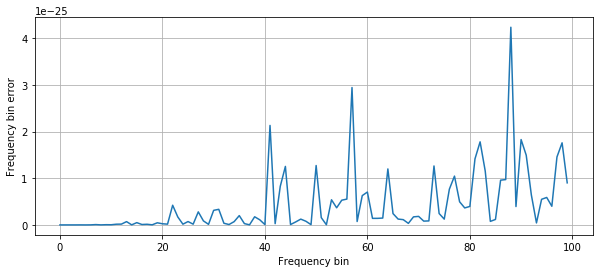

In [80]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Compute DFT using your implementation
X = dft(x)

# Compute DFT using reference implementation from numpy
X_ref = np.fft.fft(x)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

## Amplitude and Phase of DFT

In this task you have to finish implementation of the function which plots amplitude and phase of the DFT.
The plot should show actual frequencies and amplitudes of the sinusoidal components of the discrete signal.

You goal is to implement computation of three vectors inside function `plot_DFT`:
* `freqs` is a vector that contain frequencies of each bin (we are interested in actual frequency in Hertz unit not in index of bin).
* `A` is a vector that contains amplitudes for discrete frequnecy components.
* `phase` is a vector that contains phase for discrete frequncy componensts.

You should consider __all possible cases__.

For the following signal sampled with sampling frequency $f_s = 16$ [Hz] within time interval $[0, 1)$

$$
    x(t) = 1 + 4\cos\left(14\pi t + \frac{\pi}{2}\right) + \cos \left(8\pi{}t - \frac{\pi}{2} \right)
$$

the plot should looks like this one below

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAA+gAAAH0CAYAAACuKActAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde1iUdf7/8deACFJAIaCoaJZuHqgUT6kdPCSKZeq30t+WaaZumplKrclWq3ZyO62u9pUyU3Jdy23N0s0IWs+Flqdc85AZLa1AiiaYBxiY+f3hl8kJVA43zn3fPB/X5RVzzz33/f7Mm7uZF/fJ4Xa73QIAAAAAAD7l5+sCAAAAAAAAAR0AAAAAAFMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACdTxdQFm4HK5lJ2drZCQEDkcDl+XAwAAAACwILfbrRMnTqhRo0by86v8/nACuqTs7GzFxMT4ugwAAAAAgA388MMPatKkSaVfR0CXFBISIunsmxgaGurjas7P6XQqLS1N8fHxCggI8HU5qCT6Z130zrronbXRP+uid9ZF76yN/vleQUGBYmJiPBmzsgjokuew9tDQUNMH9ODgYIWGhrLBWRD9sy56Z130ztron3XRO+uid9ZG/8yjqqdOE9BhCiUut77IPKbDJ84oKiRInZuHy9+P6wEAAAAAtV1tygqmC+gzZ87U+++/r3379qlevXrq1q2bXnzxRV177bUXfN3y5cv19NNP6+DBg7rmmmv0/PPPa/DgwZeoalRH6u4czVi1Rzn5ZzzTosOCNG1AG/WLjfZhZQAAAAB8qbZlBdPdZm39+vUaP368Nm/erPT0dBUXFys+Pl4nT54872syMjI0dOhQ3X///frqq690//33a8iQIdqyZcslrBxVkbo7R+OWbPfa4CQpN/+Mxi3ZrtTdOT6qDAAAAIAv1casYLqAnpqaqgceeEBt27bVDTfcoEWLFikrK0vbtm0772tmz56tPn36KCkpSa1atVJSUpJ69+6t2bNnX8LKUVklLrdmrNojdznPlU6bsWqPSlzlzQEAAADArmprVjDdIe6/lp+fL0kKDw8/7zwZGRmaPHmy17S+ffueN6AXFhaqsLDQ87igoEDS2YsqOJ3O6pZcY0prM3ONlbEl81iZv4adyy0pJ/+MMr49rC7Nz99/q7Bb/2oTemdd9M7a6J910TvronfWZqf+WTUrVPe9d7jdbtP+ycHtdmvgwIH66aeftHHjxvPOV7duXaWkpOjee+/1TFu6dKlGjhzpFcRLTZ8+XTNmzCgzfenSpQoODjameFzUtjyHFh/wv+h8w1uWqEOEaX9NAQAAABjMqlnh1KlTuvfee5Wfn1+lO4SZeg/6I488ol27dmnTpk0XnffXl7F3u93nvbR9UlKSEhMTPY9L71UXHx9v+tuspaenq0+fPra4bUL9zGNafGDrReeLv7mLqf4qVlV2619tQu+si95ZG/2zLnpnXfTO2uzUP6tmhdKjs6vKtAF9woQJWrlypTZs2KAmTZpccN6GDRsqNzfXa9rhw4fVoEGDcucPDAxUYGBgmekBAQGW+EW2Sp0X07VFlKLDgpSbf6bcc0sckhqGBalriyhb3UbBLv2rjeidddE7a6N/1kXvrIveWZsd+mfVrFDd9910F4lzu9165JFH9P7772vNmjVq3rz5RV/TtWtXpaene01LS0tTt27daqpMGMDfz6FpA9pIOruBnav08bQBbUy1wQEAAACoebU1K5guoI8fP15LlizR0qVLFRISotzcXOXm5ur06dOeeYYPH66kpCTP44kTJyotLU0vvvii9u3bpxdffFGffvqpJk2a5IshoBL6xUYreVicokK9j2hoGBak5GFxtry3IQAAAICLq41ZwXSHuCcnJ0uSevTo4TV90aJFeuCBByRJWVlZ8vP75W8L3bp107vvvqunnnpKTz/9tK655hotW7ZMXbp0uVRloxr6xUare4sIXTc9TZKUMrKTbm4Zabu/hgEAAAConNqWFUwX0CtyUfl169aVmXb33Xfr7rvvroGKcCmcu4F1bh5u2w0OAAAAQOXUpqxgukPcAQAAAACojQjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAHTBfQNGzZowIABatSokRwOhz744IMLzr9u3To5HI4y//bt23eJKgYAAAAAoPrq+LqAXzt58qRuuOEGjRw5UnfddVeFX7d//36FhoZ6HkdGRtZEeQAAAAAA1AjTBfSEhAQlJCRU+nVRUVG64ooraqAiAAAAAABqnukCelW1b99eZ86cUZs2bfTUU0+pZ8+e5523sLBQhYWFnscFBQWSJKfTKafTWeO1VlVpbWausaqczuJzfnbK6XD7sJqaYef+2R29sy56Z230z7ronXXRO2uza/+slBWq+9473G63aUfncDi0YsUKDRo06Lzz7N+/Xxs2bFCHDh1UWFiov/71r3r99de1bt063XLLLeW+Zvr06ZoxY0aZ6UuXLlVwcLBh9aPiCkukKV+c/XvRS52LFejv44IAAAAAmIKVssKpU6d07733Kj8/3+sU7IqyfEAvz4ABA+RwOLRy5cpyny9vD3pMTIzy8vKq9CZeKk6nU+np6erTp48CAgJ8XY6hThUV64Zn10iSvnq6l4Lr2ubgDg8798/u6J110Ttro3/WRe+si95Zm137Z6WsUFBQoIiIiCoHdPOOrBpuvPFGLVmy5LzPBwYGKjAwsMz0gIAAS/wiW6XOyghwO375OSBAAQG2/NWUZM/+1Rb0zrronbXRP+uid9ZF76zNbv2zUlao7vtuutusGWHHjh2Kjo72dRkAAAAAAFSY6f708PPPP+vbb7/1PM7MzNTOnTsVHh6upk2bKikpSYcOHdLixYslSbNnz9ZVV12ltm3bqqioSEuWLNHy5cu1fPlyXw0BAAAAAIBKM11A37p1q9cV2BMTEyVJI0aMUEpKinJycpSVleV5vqioSI8//rgOHTqkevXqqW3btvroo4/Uv3//S147AAAAAABVZbqA3qNHD13ounUpKSlej6dMmaIpU6bUcFUAAAAAANQsW56DDgAAAACA1RDQAQAAAAAwAcMC+vHjx7VgwQIlJSXp2LFjkqTt27fr0KFDRq0CAAAAAADbMuQc9F27dum2225TWFiYvv/+e40ZM0bh4eFasWKF/vOf/3iuuA4AAAAAAMpnyB70xMREPfDAAzpw4ICCgoI80xMSErRhwwYjVgEAAAAAgK0ZEtC//PJLPfTQQ2WmN27cWLm5uUasAgAAAAAAWzMkoAcFBamgoKDM9P379ysyMtKIVQAAAAAAYGuGBPSBAwfqmWeekdPplCQ5HA5lZWVp6tSpuuuuu4xYBQAAAAAAtmZIQH/llVd05MgRRUVF6fTp07r11lvVokULhYSE6PnnnzdiFQAAAAAA2JohV3EPDQ3Vpk2btGbNGm3fvl0ul0txcXG67bbbjFg8AAAAAAC2Z0hAL9WrVy/16tXLyEUCAAAAAFArVDmgz5kzp8LzPvroo1VdDQAAAAAAtUKVA/qsWbO8Hh85ckSnTp3SFVdcIUk6fvy4goODFRUVRUAHAAAAAOAiqnyRuMzMTM+/559/Xu3atdPevXt17NgxHTt2THv37lVcXJyeffZZI+sFAAAAAMCWDLmK+9NPP625c+fq2muv9Uy79tprNWvWLD311FNGrAIAAAAAAFszJKDn5OR47oF+rpKSEv34449GrAIAAAAAAFszJKD37t1bY8aM0datW+V2uyVJW7du1UMPPcSt1gAAAAAAqABDAvrChQvVuHFjde7cWUFBQQoMDFSXLl0UHR2tBQsWGLEKAAAAAABszZD7oEdGRmr16tX65ptvtG/fPrndbrVu3Vq/+c1vjFg8AAAAAAC2Z0hAL/Wb3/yGUA4AAAAAQBUYEtAffPDBCz6/cOFCI1YDAAAAAIBtGRLQf/rpJ6/HTqdTu3fv1vHjx9WrVy8jVgEAAAAAgK0ZEtBXrFhRZprL5dLDDz+sq6++2ohVAAAAAABga4Zcxb3cBfv5afLkyZo1a1ZNrQIAAAAAANuosYAuSQcPHlRxcXFNrgIAAAAAAFsw5BD3xMREr8dut1s5OTn66KOPNGLECCNWAQAAAACArRkS0Hfs2OH12M/PT5GRkXr11VcveoV3AAAAAABgUEBfu3atEYsBAAAAAKDWMuQc9F69eun48eNlphcUFHCbNQAAAAAAKsCQgL5u3ToVFRWVmX7mzBlt3LjRiFUAAAAAAGBr1TrEfdeuXZ6f9+zZo9zcXM/jkpISpaamqnHjxtVZBQAAqIVKXG5tyTymbXkO1c88pq4touTv5/B1WQAA1KhqBfR27drJ4XDI4XCUeyh7vXr1NHfu3Eotc8OGDXr55Ze1bds25eTkaMWKFRo0aNAFX7N+/XolJibq66+/VqNGjTRlyhSNHTu2UusFAADmkLo7RzNW7VFO/hlJ/lp8YKuiw4I0bUAb9YuN9nV5AADUmGoF9MzMTLndbl199dX64osvFBkZ6Xmubt26ioqKkr+/f6WWefLkSd1www0aOXKk7rrrrgrV0L9/f40ZM0ZLlizRZ599pocffliRkZEVej0AADCP1N05Grdku9y/mp6bf0bjlmxX8rA4QjoAwLaqFdCbNWsmSXK5XIYUI0kJCQlKSEio8Pyvv/66mjZtqtmzZ0uSWrdura1bt+qVV14hoAMAYCElLrdmrNpTJpxLkluSQ9KMVXvUp01DDncHANhSlQP6ypUrlZCQoICAAK1cufKC8955551VXc1FZWRkKD4+3mta37599dZbb8npdCogIKDMawoLC1VYWOh5XFBQIElyOp1yOp01Vmt1ldZm5hqryuksPudnp5yO8r6eWZud+2d39M666J21bMk89n+HtZfPLSkn/4wyvj2sLs3DL11hqDS2Peuid9Zm1/5ZKStU972vckAfNGiQcnNzFRUVdcFzxB0Oh0pKSqq6movKzc1VgwYNvKY1aNBAxcXFysvLU3R02cPgZs6cqRkzZpSZnpaWpuDg4Bqr1Sjp6em+LsFwhSVS6a/jJ5+kKbByZ0ZYih37V1vQO+uid9awLc8h6eIfAGkbt+joXvN+OcMv2Pasi95Zm936Z6WscOrUqWq9vsoB/dzD2o08xL0qHA7vw9zcbne500slJSUpMTHR87igoEAxMTGKj49XaGhozRVaTU6nU+np6erTp0+5RwZY2amiYk35Yo0kqW/feAXXrdbZF6Zk5/7ZHb2zLnpnLfUzj2nxga0XnS/+5i7sQTc5tj3ronfWZtf+WSkrlB6dXVXmHVkFNWzY0Ov2bpJ0+PBh1alTR/Xr1y/3NYGBgQoMDCwzPSAgwBK/yFapszIC3L/8MeXs+Cz/q3leduxfbUHvrIveWUPXFlGKDgtSbv6Zcs9Dd0hqGBbELdcshG3Puuidtdmtf1bKCtV936s8sjlz5lR43kcffbSqq7morl27atWqVV7T0tLS1LFjR1v9UgIAYHf+fg5NG9BG45Zsl0PyCumlX82mDWhDOAcA2FaVA/qsWbMqNJ/D4ahUQP/555/17bffeh5nZmZq586dCg8PV9OmTZWUlKRDhw5p8eLFkqSxY8fqtddeU2JiosaMGaOMjAy99dZbeueddyo3IAAA4HP9YqOVPCxO01Z+rR8Lfrmga0Pugw4AqAWqHNAzMzONrMNj69at6tmzp+dx6bniI0aMUEpKinJycpSVleV5vnnz5lq9erUmT56s//3f/1WjRo00Z84cbrEGAIBF9YuNVvcWEbpuepokacH97dWzdTR7zgEAtmf4wfsXu0DbxfTo0cOzjPKkpKSUmXbrrbdq+/btVVofAAAwn3PDeKerriScAwBqBT+jFvTWW28pNjZWQUFBCgoKUmxsrBYsWGDU4gEAAAAAsDVD9qA//fTTmjVrliZMmKCuXbtKkjIyMjR58mR9//33eu6554xYDQAAAAAAtmVIQE9OTtabb76p3/72t55pd955p66//npNmDCBgA4AAAAAwEUYcoh7SUmJOnbsWGZ6hw4dVFxcbMQqAAAAAACwNUMC+rBhw5ScnFxm+vz583XfffcZsQoAAAAAAGzNsKu4v/XWW0pLS9ONN94oSdq8ebN++OEHDR8+3HOrNEn685//bNQqAQAAAACwDUMC+u7duxUXFydJOnjwoCQpMjJSkZGR2r17t2e+qt56DQAAAAAAuzMkoK9du9aIxQAAAAAAUGsZdh90AAAAAABQdYbsQT9z5ozmzp2rtWvX6vDhw3K5XF7Pb9++3YjVAAAAAABgW4YE9AcffFDp6em6++671blzZ841BwAAAACgkgwJ6B999JFWr16t7t27G7E4AAAAAABqHUPOQW/cuLFCQkKMWBQAAAAAALWSIQH91Vdf1RNPPKH//Oc/RiwOAAAAAIBax5BD3Dt27KgzZ87o6quvVnBwsAICAryeP3bsmBGrAQAAAADAtgwJ6L/97W916NAhvfDCC2rQoAEXiQMAAAAAoJIMCeiff/65MjIydMMNNxixOAAAAAAAah1DzkFv1aqVTp8+bcSiAAAAAAColQwJ6H/605/02GOPad26dTp69KgKCgq8/gEAAAAAgAsz5BD3fv36SZJ69+7tNd3tdsvhcKikpMSI1QAAAAAAYFuGBPS1a9ee97kdO3YYsQoAAAAAAGzNkIB+6623ej3Oz8/X3/72Ny1YsEBfffWVJk2aZMRqAAAAAACwLUPOQS+1Zs0aDRs2TNHR0Zo7d6769++vrVu3GrkKAAAAAABsqdp70P/73/8qJSVFCxcu1MmTJzVkyBA5nU4tX75cbdq0MaJGAAAAAABsr1p70Pv37682bdpoz549mjt3rrKzszV37lyjagMAAAAAoNao1h70tLQ0Pfrooxo3bpxatmxpVE0AAAAAANQ61dqDvnHjRp04cUIdO3ZUly5d9Nprr+nIkSNG1QYAAAAAQK1RrYDetWtXvfnmm8rJydFDDz2kd999V40bN5bL5VJ6erpOnDhhVJ0AAAAAANiaIVdxDw4O1oMPPqhNmzbp3//+tx577DH96U9/UlRUlO68804jVgEAAAAAgK0Zeps1Sbr22mv10ksv6b///a/eeecdoxcPAAAAAIAtGR7QS/n7+2vQoEFauXJllV4/b948NW/eXEFBQerQoYM2btx43nlTUlLkcDjK/Dtz5kxVywcASVKJy60tmce0Lc+hLZnHVOJy+7okAABqBJ95gO9V+z7oNWHZsmWaNGmS5s2bp+7du+uNN95QQkKC9uzZo6ZNm5b7mtDQUO3fv99rWlBQ0KUoF4BNpe7O0YxVe5STf0aSvxYf2KrosCBNG9BG/WKjfV0eAACG4TMPMIca24NeHX/+8581atQojR49Wq1bt9bs2bMVExOj5OTk877G4XCoYcOGXv8AoKpSd+do3JLt//dF5Re5+Wc0bsl2pe7O8VFlAAAYi888wDxMF9CLioq0bds2xcfHe02Pj4/X559/ft7X/fzzz2rWrJmaNGmiO+64Qzt27KjpUgHYVInLrRmr9qi8A/tKp81YtYdD/wAAlsdnHmAupjvEPS8vTyUlJWrQoIHX9AYNGig3N7fc17Rq1UopKSm67rrrVFBQoL/85S/q3r27vvrqK7Vs2bLM/IWFhSosLPQ8LigokCQ5nU45nU4DR2Os0trMXGNVOZ3F5/zslNNhvw8BO/fPbrZkHiuzF+Fcbkk5+WeU8e1hdWkefukKQ6Wx3VmX9+dCMT20GLY96+Azz17suu1ZKStU9703XUAv5XA4vB673e4y00rdeOONuvHGGz2Pu3fvrri4OM2dO1dz5swpM//MmTM1Y8aMMtPT0tIUHBxczcprXnp6uq9LMFxhiVT66/jJJ2kK9PdpOTXKjv2zm215DkkX/yVM27hFR/ea9wMCv2C7s55zPxfWrFlj688FO2PbMz8+8+zJbtuelbLCqVOnqvV60wX0iIgI+fv7l9lbfvjw4TJ71c/Hz89PnTp10oEDB8p9PikpSYmJiZ7HBQUFiomJUXx8vEJDQ6tefA1zOp1KT09Xnz59FBAQ4OtyDHWqqFhTvlgjSerbN17BdU33q1ltdu6f3dTPPKbFB7ZedL74m7uwN8Hk2O6s69zPhV69einsMi78aiVse9bBZ5692HXbs1JWKD06u6pMN7K6deuqQ4cOSk9P1+DBgz3T09PTNXDgwAotw+12a+fOnbruuuvKfT4wMFCBgYFlpgcEBFjiF9kqdVZGgPuXoyPOjs90v5qGsWP/7KZriyhFhwUpN/9MuefkOSQ1DAtS1xZR8vcr/8gemAvbnfV4fy7UoX8WxbZnfnzm2ZPdtj0rZYXqvu+mu0icJCUmJmrBggVauHCh9u7dq8mTJysrK0tjx46VJA0fPlxJSUme+WfMmKFPPvlE3333nXbu3KlRo0Zp586dnvkBoDL8/RyaNqCNpLNfTM5V+njagDZ8UQEAWB6feYC5mPJPD0OHDtXRo0f1zDPPKCcnR7GxsVq9erWaNWsmScrKypKf3y9/Wzh+/Lh+97vfKTc3V2FhYWrfvr02bNigzp07+2oIACyuX2y0kofFadrKr/VjwS8XlWzIPWEBADbDZx5gHqYM6JL08MMP6+GHHy73uXXr1nk9njVrlmbNmnUJqgJQm/SLjVb3FhG6bnqaJGnB/e3Vs3U0exEAALbDZx5gDqY8xB0AzOLcLyadrrqSLyoAANviMw/wPQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATMC0AX3evHlq3ry5goKC1KFDB23cuPGC8y9fvlxt2rRRYGCg2rRpoxUrVlyiSi+NEpdbWzKPaVueQ1syj6nE5fZ1SagEO/evxOVWxsGj+nDnIWUcPGqrsdUGdu6fnbc7yd69szu7945tD2Zl997ZfdurLer4uoDyLFu2TJMmTdK8efPUvXt3vfHGG0pISNCePXvUtGnTMvNnZGRo6NChevbZZzV48GCtWLFCQ4YM0aZNm9SlSxcfjMBYqbtzNGPVHuXkn5Hkr8UHtio6LEjTBrRRv9hoX5eHi7Bz/7zHdpZdxlYb2Ll/dt7uJHv3zu7s3ju2PZiV3Xtn922vNjHlHvQ///nPGjVqlEaPHq3WrVtr9uzZiomJUXJycrnzz549W3369FFSUpJatWqlpKQk9e7dW7Nnz77ElRsvdXeOxi3Z7vU/E0nKzT+jcUu2K3V3jo8qQ0XYuX92HlttYOf+2Xlskv3HZ2d27x3js/b47MzuvbP7+Gob0+1BLyoq0rZt2zR16lSv6fHx8fr888/LfU1GRoYmT57sNa1v376WD+glLrdmrNojtyS53QosKfJ63iFp5vs71PuqUPn7OXxRomFcRcUKLC48+/OpU3IVm+5Xs9JKXG7NfH+H6v7fuH7Nyv2z89h+zet38/RpuRzWP1zMzv2z89gk+4/vXHbb9uzeO8Zn7fGVstt2J9m/d3YfX6lzfzfdbuv/Xl6Iw22yEWZnZ6tx48b67LPP1K1bN8/0F154QW+//bb2799f5jV169ZVSkqK7r33Xs+0pUuXauTIkSosLPvLWlhY6DW9oKBAMTExysvLU2hoqMEjqrotmcc0bOFWSVJgcaE++OeTPq4IAAAAAHyn4abPdHlYiK/LOK+CggJFREQoPz+/StnStLspHQ7vv/C43e4y06o6/8yZMzVjxowy09PS0hQcHFyFamvGtjyHJH9flwEAAAAAprBx7b/krlvX12Wc16lTp6r1etMF9IiICPn7+ys3N9dr+uHDh9WgQYNyX9OwYcNKzZ+UlKTExETP49I96PHx8abag14/85gWHzi7B73Qv64G3fF8ufO9NTxOnZpdeSlLQwV8+Z+fNGrx9ovOZ8X+2Xls5XEWF2vNmjXq1auXAuqY7n+blWbn/tl5bJL9x/drdtr27N47xneWVcd3Ljttd5L9e2f38ZXnmnr1Lrjj1tcKCgqq9XrTbXV169ZVhw4dlJ6ersGDB3ump6ena+DAgeW+pmvXrkpPT/c6Dz0tLc3rEPlzBQYGKjAwsMz0gIAABQQEVHMExunaIkrRYUHKzT8jt8OhwjreNTskNQwLUtfYZpY+p8SuusaGKrz+wbP9K+d5K/fPzmMrj5/TKXfdugoMDTXV/yOqys79s/PYJPuP79fstO3ZvXeMz9rjO5edtjvJ/r2z+/isqLrbjSmv4p6YmKgFCxZo4cKF2rt3ryZPnqysrCyNHTtWkjR8+HAlJSV55p84caLS0tL04osvat++fXrxxRf16aefatKkSb4agiH8/RyaNqCNpLMb17lKH08b0IaNzaTs3D87j602sHP/7Dw2yf7jszO7947xWXt8dmb33tl9fLWRKQP60KFDNXv2bD3zzDNq166dNmzYoNWrV6tZs12gGXcAACAASURBVGaSpKysLOXk/HK7gG7duundd9/VokWLdP311yslJUXLli2zxT3Q+8VGK3lYnBqGBXlNbxgWpORhcdzX0OTs3D87j602sHP/7Dw2yf7jszO7947xWXt8dmb33tl9fLWN6a7i7gsFBQUKCwur8pX2LoUSl1sZ3x5W2sYtir+5i7q2iOIvYRZi5/6VuNz6IvOYDp84o6iQIHVuHm6bsZVyOp1avXq1+vfvb4vD/c5l5/7ZebuT7N27Unbd9uzeO7Y9a7PrdifZv3d23/asorrZ0nTnoKN8/n4OdWkerqN73epis/+Z1AZ27p+/n0Ndr6nv6zJQRXbun523O8nevbM7u/eObQ9mZffe2X3bqy0I6PrlZvfVveJeTXM6nTp16pQKCgps9xfN2oD+WRe9sy56Z230z7ronXXRO2ujf75XmimreqA6AV3SiRMnJEkxMTE+rgQAAAAAYHUnTpxQWFhYpV/HOeiSXC6XsrOzFRISYvp76sXExOiHH34w7bnyOD/6Z130zrronbXRP+uid9ZF76yN/vme2+3WiRMn1KhRI/n5Vf6a7OxBl+Tn56cmTZr4uowKCw0NZYOzMPpnXfTOuuidtdE/66J31kXvrI3++VZV9pyXMuVt1gAAAAAAqG0I6AAAAAAAmID/9OnTp/u6CFScv7+/evTooTp1ODvBiuifddE766J31kb/rIveWRe9szb6Z21cJA4AAAAAABPgEHcAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBAt6hvvvlGAwcOVEREhEJDQ9W9e3etXbvW12WhEj766CN16dJF9erVU0REhP7nf/7H1yWhEgoLC9WuXTs5HA7t3LnT1+WgAr7//nuNGjVKzZs3V7169XTNNddo2rRpKioq8nVpKMe8efPUvHlzBQUFqUOHDtq4caOvS0IFzJw5U506dVJISIiioqI0aNAg7d+/39dloQpmzpwph8OhSZMm+boUVMChQ4c0bNgw1a9fX8HBwWrXrp22bdvm67JQBQR0i7r99ttVXFysNWvWaNu2bWrXrp3uuOMO5ebm+ro0VMDy5ct1//33a+TIkfrqq6/02Wef6d577/V1WaiEKVOmqFGjRr4uA5Wwb98+uVwuvfHGG/r66681a9Ysvf766/rDH/7g69LwK8uWLdOkSZP05JNPaseOHbr55puVkJCgrKwsX5eGi1i/fr3Gjx+vzZs3Kz09XcXFxYqPj9fJkyd9XRoq4csvv9T8+fN1/fXX+7oUVMBPP/2k7t27KyAgQB9//LH27NmjV199VVdccYWvS0MVcJs1C8rLy1NkZKQ2bNigm2++WZJ04sQJhYaG6tNPP1Xv3r19XCEupLi4WFdddZVmzJihUaNG+bocVMHHH3+sxMRELV++XG3bttWOHTvUrl07X5eFKnj55ZeVnJys7777ztel4BxdunRRXFyckpOTPdNat26tQYMGaebMmT6sDJV15MgRRUVFaf369brlllt8XQ4q4Oeff1ZcXJzmzZun5557Tu3atdPs2bN9XRYuYOrUqfrss8840sgm2INuQfXr11fr1q21ePFinTx5UsXFxXrjjTfUoEEDdejQwdfl4SK2b9+uQ4cOyc/PT+3bt1d0dLQSEhL09ddf+7o0VMCPP/6oMWPG6K9//auCg4N9XQ6qKT8/X+Hh4b4uA+coKirStm3bFB8f7zU9Pj5en3/+uY+qQlXl5+dLEtuZhYwfP1633367brvtNl+XggpauXKlOnbsqHvuuUdRUVFq37693nzzTV+XhSoioFuQw+FQenq6duzYoZCQEAUFBWnWrFlKTU3lUBYLKN1TN336dD311FP65z//qSuvvFK33nqrjh075uPqcCFut1sPPPCAxo4dq44dO/q6HFTTwYMHNXfuXI0dO9bXpeAceXl5KikpUYMGDbymN2jQgNO4LMbtdisxMVE33XSTYmNjfV0OKuDdd9/V9u3bOVLFYr777jslJyerZcuW+uSTTzR27Fg9+uijWrx4sa9LQxUQ0E1k+vTpcjgcF/y3detWud1uPfzww4qKitLGjRv1xRdfaODAgbrjjjuUk5Pj62HUWhXtn8vlkiQ9+eSTuuuuu9ShQwctWrRIDodD7733no9HUTtVtHdz585VQUGBkpKSfF0yzlHR/p0rOztb/fr10z333KPRo0f7qHJciMPh8HrsdrvLTIO5PfLII9q1a5feeecdX5eCCvjhhx80ceJELVmyREFBQb4uB5XgcrkUFxenF154Qe3bt9dDDz2kMWPGeJ0mBOvgHHQTycvLU15e3gXnueqqq/TZZ58pPj5eP/30k0JDQz3PtWzZUqNGjdLUqVNrulSUo6L9y8jIUK9evbRx40bddNNNnue6dOmi2267Tc8//3xNl4pfqWjv/t//+39atWqVV0goKSmRv7+/7rvvPr399ts1XSrKUdH+lX7hzM7OVs+ePdWlSxelpKTIz4+/VZtJUVGRgoOD9d5772nw4MGe6RMnTtTOnTu1fv16H1aHipowYYI++OADbdiwQc2bN/d1OaiADz74QIMHD5a/v79nWklJiRwOh/z8/FRYWOj1HMyjWbNm6tOnjxYsWOCZlpycrOeee06HDh3yYWWoijq+LgC/iIiIUERExEXnO3XqlCSV+VLp5+fn2TuLS6+i/evQoYMCAwO1f/9+T0B3Op36/vvv1axZs5ouE+WoaO/mzJmj5557zvM4Oztbffv21bJly9SlS5eaLBEXUNH+SWdvQ9OzZ0/PkSuEc/OpW7euOnTooPT0dK+Anp6eroEDB/qwMlSE2+3WhAkTtGLFCq1bt45wbiG9e/fWv//9b69pI0eOVKtWrfTEE08Qzk2se/fuZW5n+M033/C90qII6BbUtWtXXXnllRoxYoT++Mc/ql69enrzzTeVmZmp22+/3dfl4SJCQ0M1duxYTZs2TTExMWrWrJlefvllSdI999zj4+pwIU2bNvV6fPnll0uSrrnmGjVp0sQXJaESsrOz1aNHDzVt2lSvvPKKjhw54nmuYcOGPqwMv5aYmKj7779fHTt2VNeuXTV//nxlZWVxvQALGD9+vJYuXaoPP/xQISEhnusGhIWFqV69ej6uDhcSEhJS5loBl112merXr881BExu8uTJ6tatm1544QUNGTJEX3zxhebPn6/58+f7ujRUAQHdgiIiIpSamqonn3xSvXr1ktPpVNu2bfXhhx/qhhtu8HV5qICXX35ZderU0f3336/Tp0+rS5cuWrNmja688kpflwbYVlpamr799lt9++23Zf6gwtle5jJ06FAdPXpUzzzzjHJychQbG6vVq1ezN8gCSs957dGjh9f0RYsW6YEHHrj0BQG1QKdOnbRixQolJSXpmWeeUfPmzTV79mzdd999vi4NVcA56AAAAAAAmAAn3wEAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAJjKggUL5HA45HA49Pjjjxu67OLiYs+yIyIiDF02AADVRUAHAKAGPfDAA55AeO6/b7/91telmVp4eLhycnI0bdo0z7Sbbrqp3MC+YMGCCoftOnXqKCcnR6+++qphtQIAYJQ6vi4AAAC769evnxYtWuQ1LTIystx5i4qKVLdu3UtRlqk5HA41bNiwRpbdsGFDhYaG1siyAQCoDvagAwBQwwIDA9WwYUOvf/7+/pLO7hWeOHGiJk6cqPr16yshIUGSdPz4cY0ePVqRkZEKCwvTbbfdpn//+99ey33++ecVFRWl0NBQjRkzRr///e/VsWNHz/Pl7XG+4447NHr0aM/jwsJCPf7442rcuLEuu+wy3XjjjdqwYYPn+dK90x9//LFatWqlyy+/XP3799ePP/7otdw333xTbdq0UWBgoBo1aqSJEydKkoYPH65BgwZ5zet0OhUZGanFixdX9S29oCZNmpQ5YqFOHfZJAADMj4AOAICPLVy4UMHBwcrIyNC8efPkcrmUkJCgvLw8paam6ssvv1RsbKx69+6t48ePS5KWLl2qZ599Vn/605/05ZdfKiIiQm+88Ual1z18+HBt2bJFy5Yt065duzR48GD17dtX3333nWeeEydOaPbs2frb3/6m9evX6+DBg5oyZYrn+blz52rixIkaN26cdu/erQ8++EDXXHONJGn06NH66KOPdPjwYc/8q1atUmFhoe6+++6qvmUXtGPHDuXk5CgnJ0c//PCDOnfurFtuuaVG1gUAgJH4czIAADXsn//8py6//HLP44SEBL333nuex61atdLMmTM9j9PS0rR//36tX7/ec7j7rFmz9OGHH+r999/Xgw8+qNmzZ2vMmDF68MEHJUkzZ85Uenp6per65ptv9I9//EPZ2dlq0KCBJOmJJ57Qxx9/rJSUFD3zzDOSzh52P3/+fDVr1kySNH78eL300kuSJLfbreeff15TpkzRhAkTPMvu3LmzJOmWW27R1VdfrSVLligxMVGStGjRIg0dOlTBwcGVqleS5syZo9dff91rWnFxsdf7e+7pA+PHj9eRI0e0evXqSq8LAIBLjYAOAEAN69mzp5KTkz2PL7vsMq/nzz0sXZK2bdum/Px8hYeHe00/ffq0Dh48KEnau3evJk2a5PV8165dlZGRUeG6tm3bJpfL5dnbXaqwsFCNGzf2PA4NDfWEc0mKjo727BHPycnRjz/+qN69e593PaNHj9aiRYuUmJio3Nxcpaameh1GXxnDhw/X1KlTvaa999575V70bd68eVq8eLEyMjJUv379Kq0PAIBLiYAOAEANu+yyy9SiRYsLPn8ul8ulJk2a6F//+leZea+88soKr9fPz09ut9trmtPp9FpPQECAduzYIYfD4TXfuXukAwICvJ5zOBxyuVySpHr16l20jhEjRujJJ5/Ul19+qbVr16pFixbq2rVrhcdxriuuuKLMe1neBfc+/fRTTZ48WX//+98VGxtbpXUBAHCpEdABADCZuLg4ZWdnKzAwUDExMeXO07p1a23evFn33nuvZ9rmzZu95omMjFROTo7ncXFxsb7++mvPMuPi4uR0OpWXl1flwHzllVd6/phw8803lztPVFSUBgwYoEWLFmndunWew/JryjfffKMhQ4boj3/8owYOHFij6wIAwEgEdAAATKZv377q1KmTBg4cqBdffFEtW7ZUdna2/vnPf+qee+5R+/btNXHiRI0ePVpxcXHq1q2b3n77be3fv1+/+c1vPMvp1auXnnjiCa1evVpXX321XnnlFZ04ccLzfOvWrTV06FDdd999evXVV9WuXTsdOXJE//rXv9S+fXv169evQvVOnz5dEyZMUEREhPr27asTJ07o888/1yOPPOKZZ/To0Ro0aJBcLpeGDx9u3Jv1KydPntQdd9yhTp06adSoUcrNzZV0dq9/6Xn2AACYFQEdAACT8fPzU2pqqv7whz9oxIgRysvLU3R0tG655RZFRUVJku677z599913evzxx1VYWKh77rlHDz30kNauXetZzpgxY7Rr1y4NGzZMAQEB+v3vf19mL/fixYv17LPPKjExUYcOHVJkZKRuvPFG3XnnnRWud9SoUSosLNRf/vIXJSYmKiIiQkOHDvWap2/fvoqKilJcXFyNBuWcnBwdOHBABw4cUHR0tGe6v7+/iouLa2y9AAAYweH+9clpAADAkp566imlpqZq69atvi6ljJ9//lmNGjXSkiVLLhr+FyxYoKlTpyovL6/G6rkU6wAAoLK4DzoAAKgxLpdL2dnZeuqppxQREaHbb7+9Qq87evSoLr/8cj355JOG1lNSUqLLL7/c6/B7AADMgkPcAQBAjfnuu+/UsmVLNW3aVG+//bb8/f0v+pohQ4aoR48ekip31fqK8Pf3186dOz0/AwBgJhziDgAAAACACXCIOwAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEygjq8LMAOXy6Xs7GyFhITI4XD4uhwAAAAAgAW53W6dOHFCjRo1kp9f5feHE9AlZWdnKyYmxtdlAAAAAABs4IcfflCTJk0q/ToCuqSQkBBJZ9/E0NBQH1dzfk6nU2lpaYqPj1dAQICvy0El0T/ronfWRe+sjf5ZF72zLnpnbfTP9woKChQTE+PJmJVFQJc8h7WHhoaaPqAHBwcrNDSUDc6C6J910TvronfWRv+si95ZF72zNvpnHlU9dZqLxAEAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAK2COgzZ85Up06dFBISoqioKA0aNEj79+/3dVkAAAAAAFSYLQL6+vXrNX78eG3evFnp6ekqLi5WfHy8Tp486evSAAAAAACokDq+LsAIqampXo8XLVqkqKgobdu2TbfccouPqgIAAAAAoOJssQf91/Lz8yVJ4eHhPq4EAAAAAICKscUe9HO53W4lJibqpptuUmxsbLnzFBYWqrCw0PO4oKBAkuR0OuV0Oi9JnVVRWpuZa8T50T/ronfWRe+sjf5ZF72zLnpnbfTP96r73jvcbrfboFpMYfz48froo4+0adMmNWnSpNx5pk+frhkzZpSZvnTpUgUHB9d0iQAAAAAAGzp16pTuvfde5efnKzQ0tNKvt1VAnzBhgj744ANt2LBBzZs3P+985e1Bj4mJUV5eXpXexEvF6XQqPT1dffr0UUBAgK/LQSXRP+uid9ZF76yN/lkXvbMuemdt9M/3CgoKFBERUeWAbotD3N1utyZMmKAVK1Zo3bp1FwznkhQYGKjAwMAy0wMCAizxi2yVOlE++mdd9M666J210T/ronfWRe+sjf75TnXfd1sE9PHjx2vp0qX68MMPFRISotzcXElSWFiY6tWr5+PqAAAAAAC4OFtcxT05OVn5+fnq0aOHoqOjPf+WLVvm69IAAAAAAKgQW+xBt9Fp9AAAAACAWqraAX3lypWVfk2fPn049BwAAAAAgHNUO6APGjSoUvM7HA4dOHBAV199dXVXDQAAAACAbRhyDnpubq5cLleF/nGfcQBWUuJya0vmMW3Lc2hL5jGVuDilBgAA4FIqcbmVcfCoPtx5SBkHj9r6+1i196CPGDGiUoerDxs2zNT3GgeAUqm7czRj1R7l5J+R5K/FB7YqOixI0wa0Ub/YaF+XBwAAYHve38fOsvP3sWrvQV+0aJFCQkIqPH9ycrIiIiKqu1oAqFGpu3M0bsl2rw8DScrNP6NxS7YrdXeOjyoDAACoHWrj97Eavc1aQUGBPvjgA+3du7cmVwMAhipxuTVj1R6Vd/BU6bQZq/bY+vAqAAAAX6qt38cMDehDhgzRa6+9Jkk6ffq0OnbsqCFDhuj666/X8uXLjVwVANSYLzKPlflL7bncknLyz+iLzGOXrigAAIBapLZ+HzM0oG/YsEE333yzJGnFihVyu906fvy45syZo+eee87IVQFAjTl84vwfBlWZDwAAAJVTW7+PGRrQ8/PzFR4eLklKTU3VXXfdpeDgYN1+++06cOCAkasCgBoTFRJk6HwAAAConNr6fczQgB4TE6OMjAydPHlSqampio+PlyT99NNPCgqy1xsHwL46Nw9XdFiQHOd53qGzVw/t3Dz8UpYFAABQa9TW72OGBvRJkybpvvvuU5MmTdSoUSP16NFD0tlD36+77jojVwUANcbfz6FpA9pIUpkPhdLH0wa0kb/f+T4yAAAAUB219fuYoQH94YcfVkZGhhYuXKhNmzbJz+/s4q+++mrOQQdgKf1io5U8LE5RoYFe0xuGBSl5WJwt77sJAABgJrXx+1gdoxfYsWNHdezY0Wva7bffbvRqAKDG9YuNVvcWEbpuepokacH97dWzdbTt/lILAABgVr/+PpYyspNubhlp2+9jhgb0kpISpaSk6F//+pcOHz4sl8vl9fyaNWuMXB0A1Lhz/+ff6aorbfthAAAAYFbnfv/q3Dzc1t/HDA3oEydOVEpKim6//XbFxsbK4bDvGwcAAAAAgJEMDejvvvuu/v73v6t///5GLhYAAAAAANsz9CJxdevWVYsWLYxcJAAAAAAAtYKhAf2xxx7TX/7yF7ndbiMXCwAAAACA7Rl6iPumTZu0du1affzxx2rbtq0CAgK8nn///feNXB0AAAAAALZhaEC/4oorNHjwYCMXCQAAAABArWBoQF+0aJGRiwMAAAAAoNYw9Bx0AAAAAABQNYbuQZekf/zjH/r73/+urKwsFRUVeT23fft2o1cHAAAAAIAtGLoHfc6cORo5cqSioqK0Y8cOde7cWfXr19d3332nhIQEI1cFAAAAAICtGBrQ582bp/nz5+u1115T3bp1NWXKFKWnp+vRRx9Vfn6+kasCAAAAAMBWDA3oWVlZ6tatmySpXr16OnHihCTp/vvv1zvvvGPkqgAAAAAAsBVDA3rDhg119OhRSVKzZs20efNmSVJmZqbcbreRqwIAAAAAwFYMDei9evXSqlWrJEmjRo3S5MmT1adPHw0dOpT7owMAAAAAcAGGXsV9/vz5crlckqSxY8cqPDxcmzZt0oABAzR27FgjVwUAAAAAgK0YGtD9/Pzk5/fLTvkhQ4ZoyJAhRq4CAAAAAABbqnZA37Vrl2JjY+Xn56ddu3ZdcN7rr7++uqsDAAAAAMCWqh3Q27Vrp9zcXEVFRaldu3ZyOBzlXhDO4XCopKSkuqsDAAAAAMCWqh3QMzMzFRkZ6fkZAAAAAABUXrUDerNmzcr9GQAAAAAAVFy1A/rKlSsrPO+dd95Z3dUBAAAAAGBL1Q7ogwYN8nr863PQHQ6H52fOQQcAAAAAoHx+F5/lwlwul+dfWlqa2rVrp48//ljHjx9Xfn6+Vq9erbi4OKWmphpRLwAAAAAAtmTofdAnTZqk119/XTfddJNnWt++fRUcHKzf/e532rt3r5GrAwAAAADANqq9B/1cBw8eVFhYWJnpYWFh+v77741cFQAAAAAAtmJoQO/UqZMmTZqknJwcz7Tc3Fw99thj6ty5s5GrAgAAAADAVgwN6AsXLtThw4fVrFkztWjRQi1atFDTpk2Vk5Ojt956y8hVAQAAAABgK4aeg96iRQvt2rVL6enp2rdvn9xut9q0aaPbbrvN62ruAAAAAADAm6EBXTp7W7X4+HjFx8cbvWgAAAAAAGzL8IB+8uRJrV+/XllZWSoqKvJ67tFHHzV6dQAAAAAA2IKhAX3Hjh3q37+/Tp06pZMnTyo8PFx5eXkKDg5WVFQUAR0AAAAAgPMw9CJxkydP1oABA3Ts2DHVq1dPmzdv1n/+8x916NBBr7zyipGrAgAAAADAVgwN6Dt37tRjjz0mf39/+fv7q7CwUDExMXrppZf0hz/8wchVAQAAAABgK4YG9ICAAM/V2hs0aKCsrCxJUlhYmOdnAAAAAABQlqEBvX379tq6daskqWfPnvrjH/+ov/3tb5o0aZKuu+46I1dVrnnz5ql58+YKCgpShw4dtHHjxhpf56VS4nJrS+YxbctzaEvmMZW43L4uCZVg5/6VuNzKOHhUH+48pIyDR201ttrAzv2z83Yn2bt3kr37R++sze79szO7987u215tYehF4l544QWdOHFCkvTss89qxIgRGjdunFq0aKFFixYZuaoyli1bpkmTJmnevHnq3r273njjDSUkJGjPnj1q2rRpja67pqXuztGMVXuUk39Gkr8WH9iq6LAgTRvQRv1io31dHi7Czv3zHttZdhlbbWDn/tl5u5Ps3TvJ3v2jd9Zm9/7Zmd17Z/dtrzZxuN1uQ/604na7lZWVpaioKNWrV8+IRVZKly5dFBcXp+TkZM+01q1ba9CgQZo5c+YFX1tQUKCwsDDl5+crNDS0pkutlNTdORq3ZLt+3STH//03eVgcG52J2bl/dh7buU4VFavNHz+RJH31dC+FXXbp//9WE+zcPzuPTWJ8Vh6fnccmMT6rj6+U0+nU6tWr1b9/fwUEBPi6HEPYvXd2H5/k/X1szzN9FVzX8LuFG6a62dKwkbndbrVs2VJff/21WrZsadRiK6SoqEjbtm3T1KlTvabHx8fr888/v6S1GKnE5daMVXvObmxutwJLvO8r75A08/0d6n1VqPz9HOUtAj5U4nJr5vs7VLe4sNznrdw/O4/t11xFxQr8v3G6Tp+Wy2H9w8Xs3D87j01ifFYen53HJjE+q4/vXC6nU46iIrlOnZLLBgHd7r2z+/hKnft9zKD9y6Zl2B50SWrbtq3eeust3XjjjUYtskKys7PVuHFjffbZZ+rWrZtn+gsvvKC3335b+/fv///t3XtUVXX+//HX4SKIiKmIYF7yNkuNaRRUpLybt8FSp1FbamqJK0sdjMws++Ulzak0HZsleZkos2YcR7MyZaQ0NbM0L1OWaWp+dQRTvADeEDjn90eLM55AA9y4Lz4fa7GWZ+/N/rw/vEX36+zL8dk+Ly9PeXn/+0uck5OjevXqKSsry1Jn0L/88YyGvvHzPf1BBXlavWayyRUBAAAAgHkiP9uq0GpVzS7jmnJychQeHm7+GXRJevnll/XUU08pJSVF0dHRRu66VIqeIF/E4/EUWyZJs2bN0rRp04otX79+vUJCQiqsNs8dLAAAHaxJREFUvrLameWS5G92GQAAAABgCVs2fiJPpUpml3FNFy9evKHvN/QMevXq1XXx4kUVFBSoUqVKxe5FP3PmjFFD+bhy5YpCQkK0YsUK9e/f37s8KSlJe/bs0aZNm3y2t+MZ9JIucS/yt2ExatOg+k2szHgX8wvV7s+fSpK+mNRZIYH2f2Nix/+d1cilu351Ozv2z8lzK0l+QYE2bNigrl27KjDAuvc8lZaT++fkuUnMr4gd5+fkuUnMr4hd51fk6uOxz55sr7CQIHMLMoDTe+f0+ZXEVblyiSdhrcJSZ9DnzZtn5O5KrVKlSoqNjVV6erpPQE9PT1ffvn2LbR8UFKSgoOL/4AQGBlrqYRjxTSIUVS1YJ7Ivy+NyKS/At2aXpMhqwYqPbmDre0okqfBKgXd+QWFhCrLwgx9KKz46TDVqHvq5fyWst3P/nDy3kvjl58tTqZKCwsIs9W9EeTm5f06em8T87Dw/J89NYn52n1+Rq4/HKoVVVZADHozq9N45fX52dKPHioZ+Dvrw4cOv+1WRkpOTtWTJEr3xxhvat2+fnnjiCR09elSjR4+u0HErkr+fS1PuayHpf09hLFL0esp9Lfhlsygn98/Jc7sVOLl/Tp6bxPwk+87PyXOTmJ9k7/k5mdN75/T53YpuOKDn5OSUafuiz0k32qBBgzRv3jxNnz5dLVu21ObNm7V27Vo1aNCgQsa7WXpFRyllaIwiqwX7LI+sFuyIj0xwOif3z8lzuxU4uX9OnpvE/Ow8PyfPTWJ+dp+fkzm9d06f363mhu9B9/f3V2ZmpiIiIkq1fVhYmPbs2aNGjRrdyLCGsvLnoBcpdHu07eBJrd/ypXp0iFN8kwhHvRNmp882LA8n96/Q7dH2H8/oZO5lRVQNVtuGNRwztyJO/EzYIk7un5N/7yRn905ydv/onb05uX9XH4/95/91VTUHXOJ+NSf3TnL+755dmP456B6PR0uWLFFoaGipts/Pz7/RIW9J/n4uxTWsodP7PIpz2D8mtwIn98/fz6X4xjXNLgPl5OT+Ofn3TnJ27yRn94/e2ZvT++dkTu+d03/3bhU3HNDr16+vxYsXl3r7yMhIx52BAgAAAADgRt1wQD9y5IgBZQAAAAAAcGsz9CnuAAAAAACgfAjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACzA8IC+ZcsWDR06VPHx8Tp+/Lgk6e2339Znn31m9FAAAAAAADiGoQF95cqV6tmzpypXrqzdu3crLy9PkpSbm6sXX3zRyKEAAAAAAHAUQwP6jBkz9Prrr2vx4sUKDAz0Lr/77ru1a9cuI4cCAAAAAMBRDA3o+/fvV8eOHYstDwsL07lz54wcCgAAAAAARzE0oEdFRengwYPFln/22Wdq1KiRkUMBAAAAAOAohgb0Rx99VElJSfryyy/lcrmUkZGhd955RxMmTNDjjz9u5FAAAAAAADhKgJE7mzhxorKzs9WlSxddvnxZHTt2VFBQkCZMmKCxY8caORQAAAAAAI5iaECXpJkzZ2ry5Mn67rvv5Ha71aJFC4WGhho9DAAAAAAAjmL456BLUkhIiFq3bq1mzZrp448/1r59+ypiGAAAAAAAHMPQgD5w4ED99a9/lSRdunRJbdq00cCBA3XXXXdp5cqVRg4FAAAAAICjGBrQN2/erA4dOkiS3nvvPbndbp07d07z58/XjBkzjBwKAAAAAABHMTSgZ2dnq0aNGpKktLQ0PfDAAwoJCVFCQoJ++OEHI4cCAAAAAMBRDA3o9erV07Zt23ThwgWlpaWpR48ekqSzZ88qODjYyKEAAAAAAHAUQ5/iPn78eA0ZMkShoaFq0KCBOnfuLOnnS99/+9vfGjkUAAAAAACOYmhAf/zxxxUXF6ejR4+qe/fu8vP7+QR9o0aNuAcdAAAAAIDrMPxz0GNjYxUbG+uzLCEhwehhAAAAAABwFMMD+n//+1998MEHOnr0qK5cueKz7tVXXzV6OAAAAAAAHMHQgP7JJ5/o/vvvV8OGDbV//35FR0fryJEj8ng8iomJMXIoAAAAAAAcxdCnuD/zzDN68skntXfvXgUHB2vlypU6duyYOnXqpAEDBhg5FAAAAAAAjmJoQN+3b5+GDx8uSQoICNClS5cUGhqq6dOn66WXXjJyKAAAAAAAHMXQgF6lShXl5eVJkurUqaNDhw5512VlZRk5FAAAAAAAjmLoPejt2rXT1q1b1aJFCyUkJOjJJ5/UN998o1WrVqldu3ZGDgUAAAAAgKMYGtBfffVVnT9/XpI0depUnT9/XsuXL1eTJk00d+5cI4cCAAAAAMBRDA3ojRo18v45JCRECxYsMHL3AAAAAAA4luGfgy5JV65c0cmTJ+V2u32W169fvyKGAwAAAADA9gwN6AcOHNDIkSP1+eef+yz3eDxyuVwqLCw0cjgAAAAAABzD0ID+8MMPKyAgQGvWrFFUVJRcLpeRuwcAAAAAwLEMDeh79uzRzp071axZMyN3i1tAodvj/fP2H8+oQ9Na8vfjDR4AAICb5erjsR1HzqpL82COx4CbzNDPQW/RogWfd44yS9ubqXtf3eR9PSJ1h9q/tEFpezNNrAoAAODW8cvjscS3d3M8BpjghgN6Tk6O9+ull17SxIkT9emnn+r06dM+63JycoyoFw6TtjdTjy3bpZ9y8nyWn8i+rMeW7eI/BQAAgArG8RhgHTd8ifttt93mc6+5x+NRt27dfLbhIXEoSaHbo2kffidPCes8klySpn34nbq3iOTyKgAAgArA8RhgLTcc0Ddu3GhEHbgFbf/xjDKzL19zvUdSZvZlbf/xjOIb17x5hQEAANwiOB4DrOWGA3qnTp2MqAO3oJO51/7PoDzbAQAAoGw4HgOsxZCHxF28eFFjxozR7bffroiICA0ePJiHxeFXRVQNNnQ7AAAAlA3HY4C1GBLQp0yZojfffFMJCQl68MEHlZ6erscee8yIXcPB2jasoahqwbrW3UwuSVHVgtW2YY2bWRYAAMAtg+MxwFoMCeirVq3S3/72Ny1atEjz58/XRx99pNWrV/NQOFyXv59LU+5rIUnF/lMoej3lvhY8kAQAAKCCcDwGWIshAf3YsWPq0KGD93Xbtm0VEBCgjIwMI3YPB+sVHaWUoTGKrOZ72VRktWClDI1Rr+gokyoDAAC4NXA8BljHDT8kTpIKCwtVqVIl3x0HBKigoMCI3cPhekVHqXuLSG3/8YxO5l5WRNWfL6PinVoAAICbo+h4bNvBk1q/5Uv16BCn+CYRHI8BN5khAd3j8WjEiBEKCgryLrt8+bJGjx6tKlWqeJetWrXKiOHgQP5+Lj66AwAAwET+fi7FNayh0/s8iuNkCWAKQwL68OHDiy0bOnSoEbsGAAAAAOCWYEhAT01NNWI35XLkyBG98MIL2rBhg06cOKE6depo6NChmjx5crHL7gEAAAAAsCpDArqZvv/+e7ndbi1cuFBNmjTR3r17NWrUKF24cEGzZ882uzwAAAAAAErF9gG9V69e6tWrl/d1o0aNtH//fqWkpBDQAQAAAAC2YfuAXpLs7GzVqFHjmuvz8vKUl5fnfZ2TkyNJys/PV35+foXXV15FtVm5Rlwb/bMvemdf9M7e6J990Tv7onf2Rv/Md6M/e5fH4/EYVIslHDp0SDExMZozZ44SExNL3Gbq1KmaNm1aseXvvvuuQkJCKrpEAAAAAIADXbx4UYMHD1Z2drbCwsLK/P2WDejXCtFX27Fjh1q3bu19nZGRoU6dOqlTp05asmTJNb+vpDPo9erVU1ZWVrl+iDdLfn6+0tPT1b17dwUGBppdDsqI/tkXvbMvemdv9M++6J190Tt7o3/my8nJUXh4eLkDumUvcR87dqwefPDB625zxx13eP+ckZGhLl26KD4+XosWLbru9wUFBfl8ZnuRwMBAW/xFtkudKBn9sy96Z1/0zt7on33RO/uid/ZG/8xzoz93ywb08PBwhYeHl2rb48ePq0uXLoqNjVVqaqr8/PwquDoAAAAAAIxl2YBeWhkZGercubPq16+v2bNn69SpU951kZGRJlYGAAAAAEDp2T6gr1+/XgcPHtTBgwdVt25dn3UWvb0eAAAAAIBibH8t+IgRI+TxeEr8AgAAAADALmwf0AEAAAAAcAICOgAAAAAAFkBABwAAAADAAgjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFkBABwAAAADAAgjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFkBABwAAAADAAgjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFhBgdgFW4PF4JEk5OTkmV3J9+fn5unjxonJychQYGGh2OSgj+mdf9M6+6J290T/7onf2Re/sjf6ZryhTFmXMsiKgS8rNzZUk1atXz+RKAAAAAAB2l5ubq2rVqpX5+1ye8kZ7B3G73crIyFDVqlXlcrnMLueacnJyVK9ePR07dkxhYWFml4Myon/2Re/si97ZG/2zL3pnX/TO3uif+Twej3Jzc1WnTh35+ZX9jnLOoEvy8/NT3bp1zS6j1MLCwviFszH6Z1/0zr7onb3RP/uid/ZF7+yN/pmrPGfOi/CQOAAAAAAALICADgAAAACABfhPnTp1qtlFoPT8/f3VuXNnBQRwd4Id0T/7onf2Re/sjf7ZF72zL3pnb/TP3nhIHAAAAAAAFsAl7gAAAAAAWAABHQAAAAAACyCgAwAAAABgAQR0mzpw4ID69u2r8PBwhYWF6Z577tHGjRvNLgtl8NFHHykuLk6VK1dWeHi4/vCHP5hdEsogLy9PLVu2lMvl0p49e8wuB6Vw5MgRjRw5Ug0bNlTlypXVuHFjTZkyRVeuXDG7NJRgwYIFatiwoYKDgxUbG6stW7aYXRJKYdasWWrTpo2qVq2qiIgI9evXT/v37ze7LJTDrFmz5HK5NH78eLNLQSkcP35cQ4cOVc2aNRUSEqKWLVtq586dZpeFciCg21RCQoIKCgq0YcMG7dy5Uy1btlSfPn104sQJs0tDKaxcuVIPPfSQHn74Yf3nP//R1q1bNXjwYLPLQhlMnDhRderUMbsMlMH3338vt9uthQsX6ttvv9XcuXP1+uuv69lnnzW7NPzC8uXLNX78eE2ePFm7d+9Whw4d1Lt3bx09etTs0vArNm3apDFjxuiLL75Qenq6CgoK1KNHD124cMHs0lAGO3bs0KJFi3TXXXeZXQpK4ezZs7rnnnsUGBiodevW6bvvvtOcOXN02223mV0ayoGnuNtQVlaWatWqpc2bN6tDhw6SpNzcXIWFhenjjz9Wt27dTK4Q11NQUKA77rhD06ZN08iRI80uB+Wwbt06JScna+XKlbrzzju1e/dutWzZ0uyyUA6vvPKKUlJSdPjwYbNLwVXi4uIUExOjlJQU77LmzZurX79+mjVrlomVoaxOnTqliIgIbdq0SR07djS7HJTC+fPnFRMTowULFmjGjBlq2bKl5s2bZ3ZZuI5JkyZp69atXGnkEJxBt6GaNWuqefPmWrp0qS5cuKCCggItXLhQtWvXVmxsrNnl4Vfs2rVLx48fl5+fn1q1aqWoqCj17t1b3377rdmloRR++uknjRo1Sm+//bZCQkLMLgc3KDs7WzVq1DC7DFzlypUr2rlzp3r06OGzvEePHvr8889NqgrllZ2dLUn8ntnImDFjlJCQoHvvvdfsUlBKH3zwgVq3bq0BAwYoIiJCrVq10uLFi80uC+VEQLchl8ul9PR07d69W1WrVlVwcLDmzp2rtLQ0LmWxgaIzdVOnTtVzzz2nNWvWqHr16urUqZPOnDljcnW4Ho/HoxEjRmj06NFq3bq12eXgBh06dEivvfaaRo8ebXYpuEpWVpYKCwtVu3Ztn+W1a9fmNi6b8Xg8Sk5OVvv27RUdHW12OSiFf/zjH9q1axdXqtjM4cOHlZKSoqZNm+rf//63Ro8erT/96U9aunSp2aWhHAjoFjJ16lS5XK7rfn311VfyeDx6/PHHFRERoS1btmj79u3q27ev+vTpo8zMTLOnccsqbf/cbrckafLkyXrggQcUGxur1NRUuVwurVixwuRZ3JpK27vXXntNOTk5euaZZ8wuGVcpbf+ulpGRoV69emnAgAFKTEw0qXJcj8vl8nnt8XiKLYO1jR07Vl9//bX+/ve/m10KSuHYsWNKSkrSsmXLFBwcbHY5KAO3262YmBi9+OKLatWqlR599FGNGjXK5zYh2Af3oFtIVlaWsrKyrrvNHXfcoa1bt6pHjx46e/aswsLCvOuaNm2qkSNHatKkSRVdKkpQ2v5t27ZNXbt21ZYtW9S+fXvvuri4ON17772aOXNmRZeKXyht7x588EF9+OGHPiGhsLBQ/v7+GjJkiN56662KLhUlKG3/ig44MzIy1KVLF8XFxenNN9+Unx/vVVvJlStXFBISohUrVqh///7e5UlJSdqzZ482bdpkYnUorXHjxmn16tXavHmzGjZsaHY5KIXVq1erf//+8vf39y4rLCyUy+WSn5+f8vLyfNbBOho0aKDu3btryZIl3mUpKSmaMWOGjh8/bmJlKI8AswvA/4SHhys8PPxXt7t48aIkFTuo9PPz856dxc1X2v7FxsYqKChI+/fv9wb0/Px8HTlyRA0aNKjoMlGC0vZu/vz5mjFjhvd1RkaGevbsqeXLlysuLq4iS8R1lLZ/0s8fQ9OlSxfvlSuEc+upVKmSYmNjlZ6e7hPQ09PT1bdvXxMrQ2l4PB6NGzdO7733nj799FPCuY1069ZN33zzjc+yhx9+WM2aNdPTTz9NOLewe+65p9jHGR44cIDjSpsioNtQfHy8qlevruHDh+v5559X5cqVtXjxYv34449KSEgwuzz8irCwMI0ePVpTpkxRvXr11KBBA73yyiuSpAEDBphcHa6nfv36Pq9DQ0MlSY0bN1bdunXNKAllkJGRoc6dO6t+/fqaPXu2Tp065V0XGRlpYmX4peTkZD300ENq3bq14uPjtWjRIh09epTnBdjAmDFj9O677+r9999X1apVvc8NqFatmipXrmxydbieqlWrFntWQJUqVVSzZk2eIWBxTzzxhO6++269+OKLGjhwoLZv365FixZp0aJFZpeGciCg21B4eLjS0tI0efJkde3aVfn5+brzzjv1/vvv63e/+53Z5aEUXnnlFQUEBOihhx7SpUuXFBcXpw0bNqh69epmlwY41vr163Xw4EEdPHiw2Bsq3O1lLYMGDdLp06c1ffp0ZWZmKjo6WmvXruVskA0U3fPauXNnn+WpqakaMWLEzS8IuAW0adNG7733np555hlNnz5dDRs21Lx58zRkyBCzS0M5cA86AAAAAAAWwM13AAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFkBABwAAAADAAgjoAADAUpYsWSKXyyWXy6UJEyYYuu+CggLvvsPDww3dNwAAN4qADgBABRoxYoQ3EF79dfDgQbNLs7QaNWooMzNTU6ZM8S5r3759iYF9yZIlpQ7bAQEByszM1Jw5cwyrFQAAowSYXQAAAE7Xq1cvpaam+iyrVatWidteuXJFlSpVuhllWZrL5VJkZGSF7DsyMlJhYWEVsm8AAG4EZ9ABAKhgQUFBioyM9Pny9/eX9PNZ4aSkJCUlJalmzZrq3bu3JOncuXNKTExUrVq1VK1aNd1777365ptvfPY7c+ZMRUREKCwsTKNGjdJTTz2l1q1be9eXdMa5T58+SkxM9L7Oy8vThAkTdPvtt6tKlSpq166dNm/e7F1fdHZ63bp1atasmUJDQ/X73/9eP/30k89+Fy9erBYtWigoKEh16tRRUlKSJGnYsGHq16+fz7b5+fmqVauWli5dWt4f6XXVrVu32BULAQGckwAAWB8BHQAAk73xxhsKCQnRtm3btGDBArndbvXu3VtZWVlKS0vTjh07FB0drW7duuncuXOSpHfffVcvvPCC/vznP2vHjh0KDw/XwoULyzz2sGHD9OWXX2r58uX6+uuv1b9/f/Xs2VOHDx/2bpObm6t58+bpnXfe0aZNm3To0CFNnDjRu/61115TUlKSHnvsMe3du1erV69W48aNJUmJiYn66KOPdPLkSe/2H374ofLy8vTHP/6xvD+y69q9e7cyMzOVmZmpY8eOqW3bturYsWOFjAUAgJF4OxkAgAq2Zs0ahYaGel/37t1bK1as8L5u1qyZZs2a5X29fv167d+/X5s2bfJe7j537ly9//77WrVqlR555BHNmzdPo0aN0iOPPCJJmjVrltLT08tU14EDB/Svf/1LGRkZql27tiTp6aef1rp16/Tmm29q+vTpkn6+7H7RokVq0KCBJGnMmDF6+eWXJUkej0czZ87UxIkTNW7cOO++27ZtK0nq2LGjGjVqpGXLlik5OVmSlJqaqkGDBikkJKRM9UrS/Pnz9frrr/ssKygo8Pn5Xn37wJgxY3Tq1CmtXbu2zGMBAHCzEdABAKhgXbp0UUpKivd1lSpVfNZffVm6JO3cuVPZ2dmqUaOGz/JLly7p0KFDkqR9+/Zp/PjxPuvj4+O1bdu2Ute1c+dOud1u79nuInl5ebr99tu9r8PCwrzhXJKioqK8Z8QzMzP1008/qVu3btccJzExUampqUpOTtaJEyeUlpbmcxl9WQwbNkyTJk3yWbZixYoSH/q2YMECLV26VNu2bVPNmjXLNR4AADcTAR0AgApWpUoVNWnS5Lrrr+Z2u1W3bl198sknxbatXr16qcf18/OTx+PxWZafn+8zTmBgoHbv3i2Xy+Wz3dVnpAMDA33WuVwuud1uSVLlypV/tY7hw4dr8uTJ2rFjhzZu3KgmTZooPj6+1PO42m233VbsZ1nSA/c+/vhjPfHEE/rnP/+p6Ojoco0FAMDNRkAHAMBiYmJilJGRoaCgINWrV6/EbZo3b64vvvhCgwcP9i774osvfLapVauWMjMzva8LCgr07bffevcZExOj/Px8ZWVllTswV69e3ftmQocOHUrcJiIiQvfdd59SU1P16aefei/LrygHDhzQwIED9fzzz6tv374VOhYAAEYioAMAYDE9e/ZUmzZt1LdvX7300ktq2rSpMjIytGbNGg0YMECtWrVSUlKSEhMTFRMTo7vvvltvvfWW9u/fr9/85jfe/XTt2lVPP/201q5dq0aNGmn27NnKzc31rm/evLkGDRqkIUOGaM6cOWrZsqVOnTqlTz75RK1atVKvXr1KVe/UqVM1btw4hYeHq2fPnsrNzdXnn3+usWPHerdJTExUv3795Ha7NWzYMON+WL9w4cIF9enTR23atNHIkSN14sQJST+f9S+6zx4AAKsioAMAYDF+fn5KS0vTs88+q+HDhysrK0tRUVHq2LGjIiIiJElDhgzR4cOHNWHCBOXl5WnAgAF69NFHtXHjRu9+Ro0apa+//lpDhw5VYGCgnnrqqWJnuZcuXaoXXnhBycnJOn78uGrVqqV27drp/vvvL3W9I0eOVF5env7yl78oOTlZ4eHhGjRokM82PXv2VEREhGJiYio0KGdmZuqHH37QDz/8oKioKO9yf39/FRQUVNi4AAAYweX55c1pAADAlp577jmlpaXpq6++MruUYs6fP686depo2bJlvxr+lyxZokmTJikrK6vC6rkZYwAAUFZ8DjoAAKgwbrdbGRkZeu655xQeHq6EhIRSfd/p06cVGhqqyZMnG1pPYWGhQkNDfS6/BwDAKrjEHQAAVJjDhw+radOmql+/vt566y35+/v/6vcMHDhQnTt3llS2p9aXhr+/v/bs2eP9MwAAVsIl7gAAAAAAWACXuAMAAAAAYAEEdAAAAAAALICADgAAAACABRDQAQAAAACwAAI6AAAAAAAWQEAHAAAAAMACCOgAAAAAAFgAAR0AAAAAAAsgoAMAAAAAYAEEdAAAAAAALICADgAAAACABRDQAQAAAACwAAI6AAAAAAAWQEAHAAAAAMAC/j/reMr2K8+s9QAAAABJRU5ErkJggg==" />

In [81]:
def plot_DFT(X, fs, only_positive_half=True, semilog=False):
    """
    This function plots 
    
    Parameters
    ----------
    X: numpy array of shape (N, )
        Vector containing samples of DFT
    fs: floating point
        Sampling frequency
    only_positive_half: boolean
        Plot only positive frequencies if only_positive_half is True
        
    Returns
    -------
    None but shows plot
    
    """
    
    # Number of samples in signal
    N = X.size
    
    # Put your code here

    freqs = np.zeros(N)
    for i in range(N):
        freqs[i] = i - N/2
        
    A = np.zeros(N)
    A = np.abs(X)/fs
    
    phase = np.angle(X)

    for i in range(N):
        if A[i] < 0.0000001:
            phase[i] = 0
            A[i] = 0
            
    amp = A.copy()
    fi = phase.copy()
    for i in range(N):
        amp[i] = A[(i - N//2)]
        fi[i] = phase[(i - N//2)]
    A = amp
    phase = fi
    
    if only_positive_half == True:
        tempAmp = A.copy()
        tempFi = phase.copy()
        for i in range(N):
            tempAmp[i] = A[N//2-i]
            tempFi[i] = phase[N//2 - i]
        A = np.zeros(N//2)
        phase = np.zeros(N//2)
        freqs = np.zeros(N//2)
        for i in range(N//2):
            A[i] = tempAmp[i]
            phase[i] = tempFi[i]
            freqs[i] = i

    # Plot signal
    fig, (ax_amp, ax_phase) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=100)
    
    ax_amp.stem(freqs, A, use_line_collection=True)
    if semilog:
        ax_amp.set_yscale('log', basey=10)
    ax_amp.set_ylabel('Amplitude')
    ax_amp.set_xlabel('Frequency [Hz]')
    ax_amp.grid()
    
    ax_phase.stem(freqs, phase, use_line_collection=True)
    ax_phase.set_ylabel('Phase [radians]')
    ax_phase.set_xlabel('Frequency [Hz]')
    ax_phase.set_ylim([-np.pi, np.pi])
    ax_phase.grid()
    
    plt.tight_layout()
    plt.savefig('asdf.png')
    plt.show()

### Verify your implementation

Examine your implementation with different lenght of signal (even/odd number of samples) and different sinusoidal components to verify if your implementation is correct.

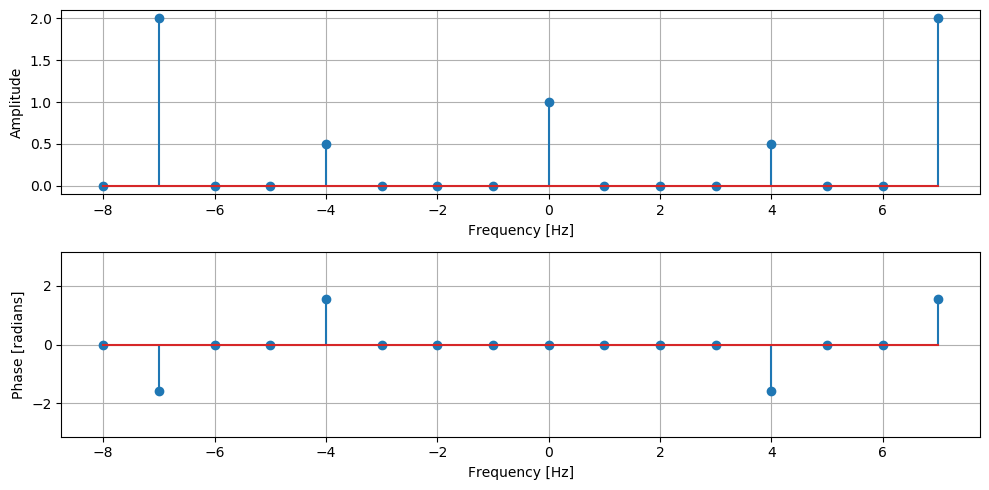

In [82]:
fs = 16   # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_e = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(t_s, t_e, dt)

# Generate reference signal
x = 1 + 4*np.cos(14*np.pi*t + np.pi/2) + np.cos(8*np.pi*t - np.pi/2)

# Compute DFT using your implementation
X = dft(x)

# Plot DFT spectrum
plot_DFT(X, fs=fs, only_positive_half=False)

### Questions#1

**Question**: What is the phase of the complex number when amplitude is equal to zero?

**Anwser**: The phase is equal to zero because if we have amplitude 0 + j0, amplitude is np.sqrt((np.real(X))**2 + (np.imag(X)**2)) and the phase is np.arctan(np.imag(X) , np.real(X)) but arctan(0) = 0.

## DFT as a linear map

DFT is a linear transformation and can be reformulated to the following form

$$\large
    \hat{\mathbf{x}} = \mathbf{E} \cdot \mathbf{x},
$$
where $\hat{\mathbf{x}} \in \mathbb{C}^{N}$, $\mathbf{E} \in \mathbb{C}^{N\times{}N}$, $\mathbf{x} \in \mathbb{R}^N$, and $N$ is the number of samples.

Implement DFT using matrix formulation. Figure out how to create matrix $\mathbf{E}$ based on the previously given formula of DFT.
Your implementation must not use any loops and be fully vectorized.

In [83]:
def smallValues(complex_num):
    real_p = complex_num.real if np.abs(complex_num.real) >0.0001 else 0
    imag_p = complex_num.imag if np.abs(complex_num.imag) > 0.0001 else 0
    return complex(real_p, imag_p)

def mdft(x):
    """
    This function should compute Discrete Fourier Transform
    
    Parameters
    ----------
    x: numpy array of shape (N, )
        Vector containing samples of discrete signal in time domain.
    
    Returns
    -------
    X: numpy array of shape (N, )
        Vector containing samples of discrete signal in frequency domain.
    """
    N = x.size
    # Put your code here
 
    m = np.arange(N)
    kn = np.zeros((N,N))
    kn[:]=m
    print(kn)
    kn *= kn.T
    print(kn)
    E = np.zeros((N,N),dtype=complex)
    E = (np.exp(-1j * 2* np.pi / N)) ** kn 
    func = np.vectorize(smallValues) 
    E =func(E)
    X = E.dot(x)
    return X

### Verify your implementation

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 

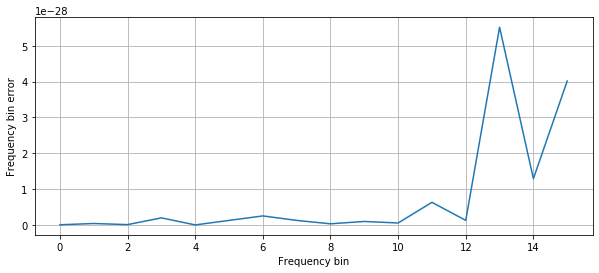

In [84]:
fs = 16  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Compute DFT using your implementation
X = mdft(x)

# Compute DFT using reference implementation from numpy
X_ref = np.fft.fft(x)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

### Questions#1

**Question**: For discrete signal of lenght $N$ is matrix $\mathbf{E}$ constant?

**Anwser**: Yes, it's the only variable - time samples vector size

### Interpretation (optional)

Since matrix $\mathbf{E}$ is a linear map, find the [orthonormal basis](https://en.wikipedia.org/wiki/Orthonormal_basis) of this map and investigate the vectors from the basis for different $N$.

## Fast Fourier Transform

Implement DFT using [radix-2](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) Fast Fourier Transform (FFT).

In [85]:
def fft_radix2(x):
    """
    This function should compute Discrete Fourier Transform using Fast Fourier Transform (radix-2) algorithm.
    
    Parameters
    ----------
    x: numpy array of shape (2**k, )
        Vector containing samples of discrete signal in time domain.
        `k` is integer constant.
    
    Returns
    -------
    X: numpy array of shape (2**k, )
        Vector containing samples of discrete signal in frequency domain.
        `k` is integer constant.
    """
    # Check if it is a vector
    assert x.ndim == 1, 'Input array should be 1-dimensional array, i.e x.shape == (N, )'
    
    # Number of samples in X
    N = x.size
    
    # Check if input array has proper shape
    assert np.log2(x.size).is_integer(), 'Number of samples should be 2**K'

    
    # Put your code here
    X = np.zeros(N, dtype=np.complex)
    w = np.exp(-2j * np.pi / N)
    if N == 2 :
        X[0] = x[0] + x[1]
        X[1] = x[0] - x[1]
        return X
    x1 = np.zeros(N//2,)
    x2 = np.zeros(N//2)
    for i in range(len(x)):
        if i%2 == 0:
            x1[int(i/2)] = x[i]
        else:
            x2[int((i-1)/2)] = x[i]
    E = fft_radix2(x1)
    O = fft_radix2(x2)
    for k in range (N):
        if k < N/2:
            X[k] = E[k] + O[k] * w ** k
        else:
            X[k] = E[k - N//2] - O[k - N//2] * w ** (k-N//2)
    
    return X


### Verify your implementation

RMSE: 2.67e-13
Your FFT implementation succeeded


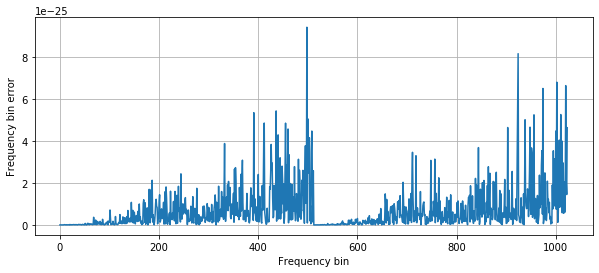

In [86]:
fs = 2**10  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Compute DFT using your implementation
X = fft_radix2(x)

# Compute DFT using reference implementation from numpy
X_ref = np.fft.fft(x)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your FFT implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

## Compare speed of DFT implementations

At this point we have four different implementations of DFT.
In this task you have to write a simple benchmark for those functions to check how fast each implementation can compute DFT for signal of length $N$.
In order to estimate this value you should execute $R$ times each investigated function for given signal of length $N$.
In result of the task you should obtain a four curves (for each function ) on figure where x axis corresponds to number of samples and y axis correspond to mean time of execution.

To measure time in Python you can use following snippet:
```Python
t_start = time.time()

# Block of code. For example:
time.sleep(1)

t_end = time.time()

duration = t_end - t_start
print(duration)

```

Since `fft_radix2` works only for signals of lenght $2^k :  k \in \mathbb{N}^+ $, you should choose
only signal of those lengths to test.
Below, there is a table which contain proposed maximal number of samples $2^K$ for each function.

| Implementation   | K     |
|:---------------- |:-----:|
| `dft`            | 8     |
| `mdft`           | 11    |
| `fft_radix2`     | 12    | 
| `np.fftpack.fft` | 22    |

Blow is a started code that you can use.

In [87]:
# Number of repetitions for each test point on characteristic
R = 3

# Dictionary containing DFT implementation with corresponding K value
DFT_IMPLEMENTATIONS_LIST = {
    'dft':        (dft, 7),
    'mdft':       (mdft, 11),
    'fft_radix2': (fft_radix2, 12),
    'fft':        (np.fft.fft, 22),
}

# This is a dict where you should store your results as a tuple (test_N, time)
# where test_N is a vector containing number of samples for which function was tested
# and time is a vector that containing mean execution time for signal of length N from test_N
results = {
    'dft':        None,
    'mdft':       None,
    'fft_radix2': None,
    'fft':        None,
}

for name, (fft, K) in tqdm(DFT_IMPLEMENTATIONS_LIST.items()):
    
    N = np.asarray([2**k for k in range(1, K)])
    
    # Put your code here
    array = np.zeros(N.size)
    iterator = 0
    for i in N:
        t_start=time.time()
        for b in range(R):
            signal = np.random.rand(i)
            fft(signal)
        t_end = time.time()
        array[iterator] = (t_end-t_start)/R
        iterator += 1
    results[name] = (N, array)

[[0. 1.]
 [0. 1.]]
[[0. 0.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]]
[[0. 0.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]]
[[0. 0.]
 [0. 1.]]
[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 3.]
 [0. 2. 4. 6.]
 [0. 3. 6. 9.]]
[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 3.]
 [0. 2. 4. 6.]
 [0. 3. 6. 9.]]
[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 3.]
 [0. 2. 4. 6.]
 [0. 3. 6. 9.]]
[[0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 0.  2.  4.  6.  8. 10. 12. 14.]
 [ 0.  3.  6.  9. 12. 15. 18. 21.]
 [ 0.  4.  8. 12. 16. 20. 24. 28.]
 [ 0.  5. 10. 15. 20. 25. 30. 35.]
 [ 0.  6. 12. 18. 24. 30. 36. 42.]
 [ 0.  7. 14. 21. 28. 35. 42. 49.]]
[[0. 1. 2. 3. 4. 5. 6.

### Plot the results

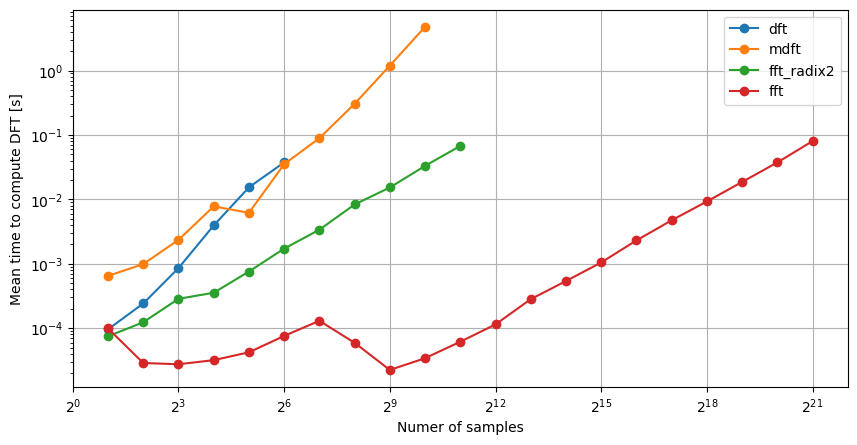

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=100)

for name, (test_N, r) in results.items():
    ax.plot(test_N, r, 'o-', label=name)

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
    
ax.set_ylabel('Mean time to compute DFT [s]')
ax.set_xlabel('Numer of samples')
ax.legend()
ax.grid()
plt.show()

### Question#1

**Question**: Consider $N$ samples of signal. Does the computation time of the DFT depends on the values of the singal?

**Anwser**: Computation time of the DFT doesn't depend on the values of signal but it depends on number of samples and implementation quality.

### Question#2

**Question**: Try to explain differences and similarities of execution time between implementations of DFT. What are computetional complexity of those implementations?

**Anwser**: Computational complexity of:
DFT/MDFT is N^2,
FFT-radix2 is N*log N.
FFT-radix2 divides DFT into two parts: odd and even indexes. Due to recurrence used to implement it, it is faster and maybe it is the reason why is more often used.

## Inverse Discrete Fourier Transform (iDFT)

Implement [iDFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Inverse_transform) operation.

<div style="border: solid; padding: 20px">
<b style="font-size: 12pt">Inverse Discrete Fourier Transform (iDFT)</b>
$$\large
    {\mathbf{x}}[n] = \frac{1}{N}\sum_{n=0}^{N-1} \hat{\mathbf{x}}[k] \exp\left( j2\pi \frac{kn}{N} \right)
$$
</div>

In [89]:
def idft(X):
    """
    This function should compute inverse Discrete Fourier Transform using naive implementation.
    
    Parameters
    ----------
    X: numpy array of shape (N, )
        Vector containing samples of discrete signal in frequency domain.
    
    Returns
    -------
    x: numpy array of shape (N, )
        Vector containing samples of discrete signal in time domain.
    """
    N = X.size

    # Put your code here
    x = np.zeros(N,)
    for n in range(len(x)):
        for k in range(len(X)):
            x[n] = x[n] + X[k] * np.exp(2j*np.pi*k*n/N)
    x = x/N
    return x

### Verify your implementation

/home/teacher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


RMSE: 1.5e-14
Your implementation succeeded


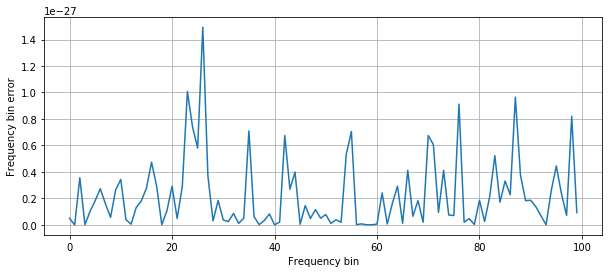

In [90]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Error between your implementation and reference implementation
X_err = np.abs(x - idft(dft(x)))**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

### Question#1

**Question**: Since DFT is a linear mapping it can be expressed as $\hat{\mathbf{x}} = \mathbf{E} \cdot \mathbf{x}$. Can we express iDFT as linear map $\mathbf{B}$ as well? Is there any relation between $\mathbf{E}$ and $\mathbf{B}$?

**Anwser**: (Put your anwser here)

## Numberical error of DFT

In this task you should examine the numerical error introduced by iteratively applied DFT/iDFT operation on a sampled signal.
In the $i-th$ iteration compute vector $\mathbf{x}_{i+1}$ as
$$
    \mathbf{x}_{i+1} = \mathrm{DFT}\Big(\mathrm{iDFT}\big(\mathbf{x}_{i} \big)\Big)
    \quad \text{ where } \mathbf{x}_{0} = \mathbf{x}_{\mathrm{ref}}
$$
and store RMSE in `err` list for each iteration between vector $\mathbf{x}_{i+1}$ and $\mathbf{x}_{\mathrm{ref}}$.

Since in this task you have to iterate about 1000 times to get nice figure, you should use `np.fft.fft` and `np.fft.ifft` functions to perform `DFT` and `iDFT` quickly.

In [91]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Put your code here
N = t.size
err = np.zeros(N)
for i in range(N):
    X = np.abs(x - np.fft.fft(np.fft.ifft(x)))**2
    err[i] = err[i-1] + np.sqrt(np.mean(X))

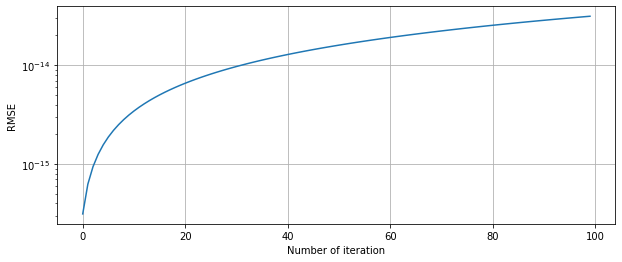

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.semilogy(err, '-')
ax.set_ylabel('RMSE')
ax.set_xlabel('Number of iteration')
plt.grid()
plt.show()

## Spectral Leakage

This task assumes that you are familiar with [spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage) and [window functions](https://en.wikipedia.org/wiki/Window_function). If not feel free to read about them in wikipedia/lectures/literature.

Consider a case when there are two frequency components in the signal. The first signal has amplitude of 1 and the second one has an amplitude of 0.01. If the frequencies of those compontents hits frequency bins then we will see two distinct peaks as in the example below

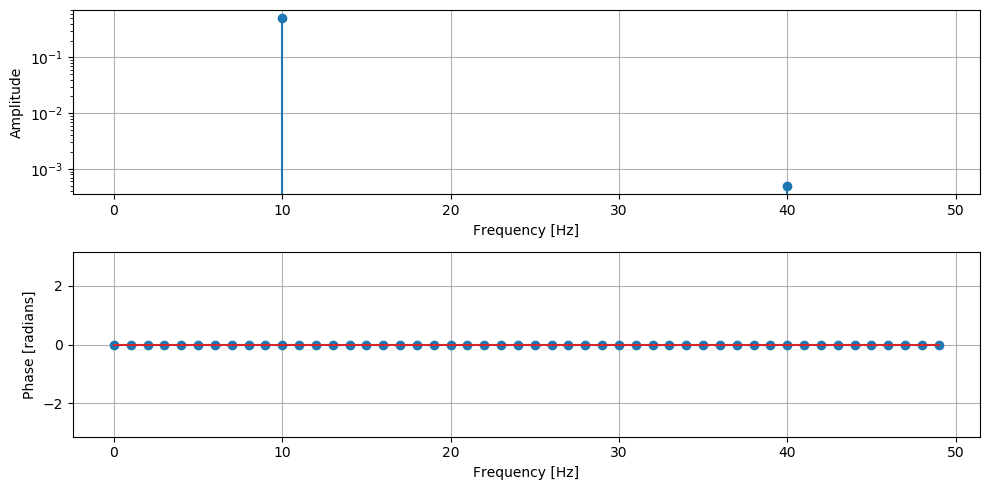

In [93]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = 1e-3*np.cos(2*np.pi*40*t) + np.cos(2*np.pi*10*t) 

# Compute DFT
X = dft(x)

# Plot the spectrum
plot_DFT(X, fs=fs, semilog=True)

But if the stronger peak has different frequency than frequency bins, spectral leakage spoils the FUN!
Modify below code that the peak of the sinusoidal component with frequency 40 [Hz] will be visible in the spectrum.

No, you can't change the signal.

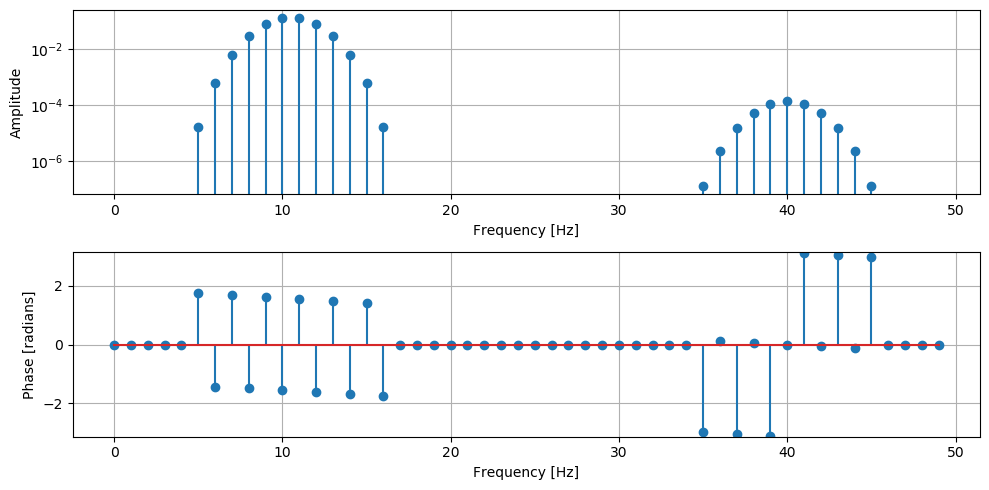

In [94]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = 1e-3*np.cos(2*np.pi*40*t) + np.cos(2*np.pi*10.5*t) 

# Put your code here
N = t.size
A = np.arange(N)
X = dft(np.kaiser(100,20)*x)

plot_DFT(X, fs=fs, semilog=True)

### Question#1

**Question**: Which window provides best frequency resolution (narrower main lobe)?

**Anwser**: (Put your anwser here)

### Question#2

**Question**: Which window provides worst dynamic range?

**Anwser**: (Put your anwser here)